<a href="https://colab.research.google.com/github/Jaiharish-passion07/Almabetter-Capstone_project/blob/master/Jai_Harish_capstone_project_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing all Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

### Data Frame of Airbnb

In [3]:
df_air=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Project/EDA/Datas/Airbnb NYC 2019.csv')
#df_air=pd.read_csv('C:\\Users\\ADMIN\\Downloads\\airbnb\\Airbnb NYC 2019.csv')
df_air=pd.DataFrame(df_air)

In [4]:
# Head of DF
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#Tail fo DF
df_air.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
# Remove Unwanted Columns
df_air.drop('id',axis=1,inplace=True)

In [7]:
# Shape of DataFrame
df_air.shape

(48895, 15)

In [8]:
df_air.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


From Statistical Information we can see that price column has zero value.It is not a correct data.

In [9]:
df_air=df_air.loc[df_air['price']!=0]

In [10]:
df_air.dtypes.reset_index().rename(columns={'index':'Column',0:'Datatype'})

,Column,Datatype
0,name,object
1,host_id,int64
2,host_name,object
3,neighbourhood_group,object
4,neighbourhood,object
5,latitude,float64
6,longitude,float64
7,room_type,object
8,price,int64
9,minimum_nights,int64


### Univariate Analysis

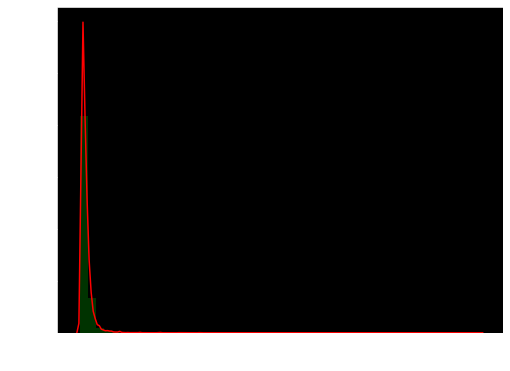

In [11]:
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
sns.distplot(df_air['price'],kde=True,color='green',kde_kws={'color':'r'})

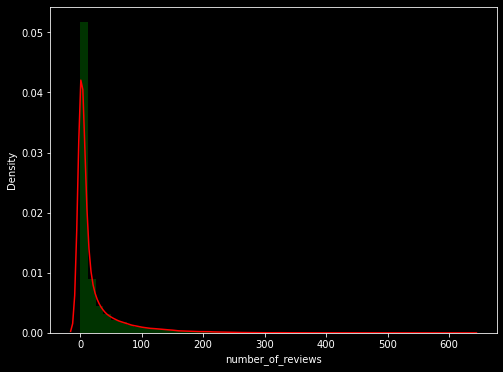

In [12]:
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
sns.distplot(df_air['number_of_reviews'],kde=True,color='green',kde_kws={'color':'r'})

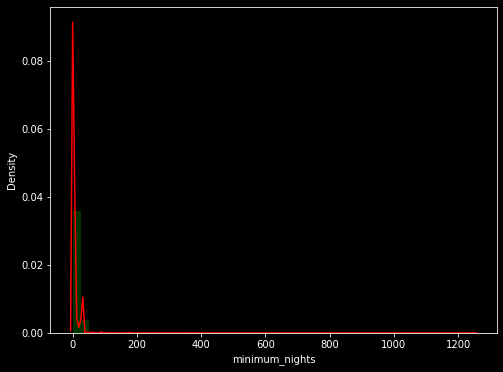

In [13]:
plt.figure(figsize=(8,6))
plt.style.use("dark_background")
sns.distplot(df_air['minimum_nights'],kde=True,color='green',kde_kws={'color':'r'})

### Correlation plot

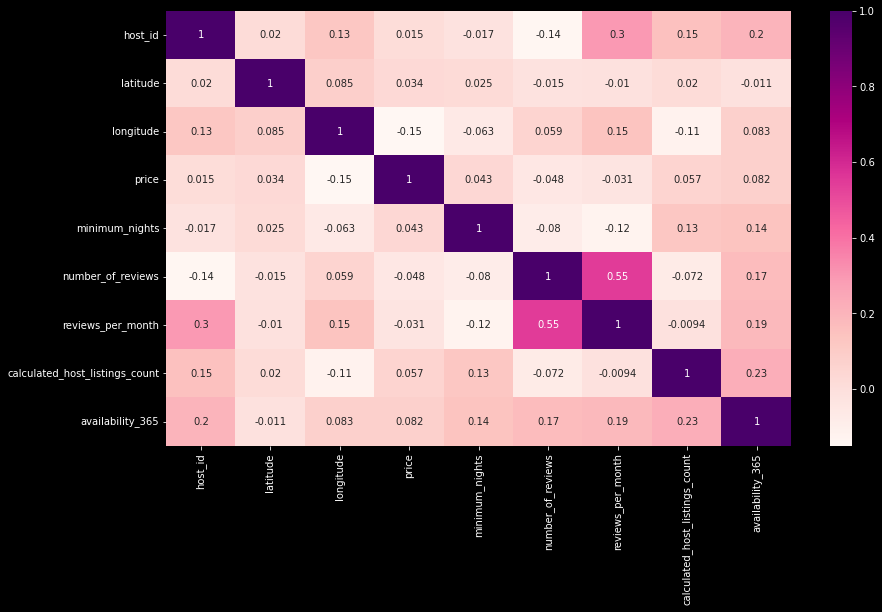

In [14]:
plt.figure(figsize=(14,8))
sns.heatmap(df_air.corr(),annot=True,cmap='RdPu')

### __Cleaning Data by Null values Removal__

1. Removing __host_name__ column datas from Dataframe
2. Replacing __name__ column null values by __'Missing'__ Labels
3. __Mode Imputation__ Techniques used for __Last review__ column
4. __Median Imputation__ Techniques used for __reviews_per_month__ column

__Visualization of Null values using Heatmap__

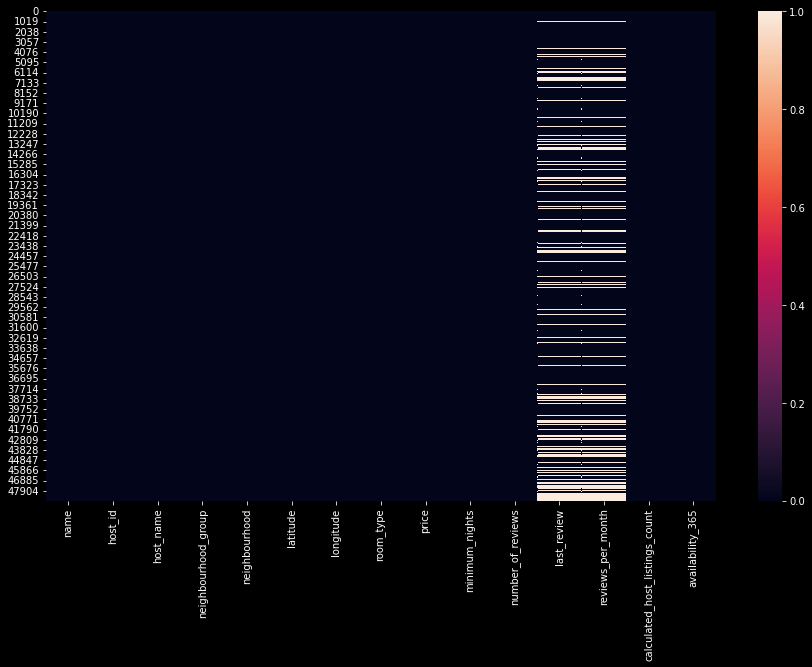

In [15]:
plt.figure(figsize=(15,9))
sns.heatmap(df_air.isnull())

In [16]:
df_air1=df_air.copy()
df_air_clean=df_air1.loc[~df_air1['host_name'].isnull()]
df_air_clean['name'].replace({np.nan:'Missing'},inplace=True)

In [17]:
df_air_clean['reviews_per_month'].fillna(df_air_clean['reviews_per_month'].median(),inplace=True)
df_air_clean['last_review'].fillna(df_air_clean['last_review'].mode().values[0],inplace=True)

In [18]:
df_air_clean.isnull().sum().reset_index().rename(columns={'index':'Column',0:'Count'})

,Column,Count
0,name,0
1,host_id,0
2,host_name,0
3,neighbourhood_group,0
4,neighbourhood,0
5,latitude,0
6,longitude,0
7,room_type,0
8,price,0
9,minimum_nights,0
